#Assignment 2
*   Name: Thakgalo
*   Surname: Sehlola




#Import Libraries

In [1]:
# Core data analysis
import pandas as pd
import numpy as np

# Statistical analysis
from scipy.stats import linregress
from scipy import stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date handling
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

#!pip install python-docx

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

#Load the Dataset

In [3]:
import os

# Load your data
data_path = 'Pretoria2_TerraClimate_1964_2024.csv'
if os.path.exists(data_path):
    df = pd.read_csv(data_path)
else:
    print(f"Data file not found: {data_path}")

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Calculate derived variables
df['tmean'] = (df['tmax'] + df['tmin']) / 2
df['temp_range'] = df['tmax'] - df['tmin']

In [4]:
print(df.shape)

(732, 8)


In [5]:
print(df.head())

        date  prec  tmax  tmin  year  month  tmean  temp_range
0 1964-01-01   176  27.9  14.9  1964      1   21.4        13.0
1 1964-02-01    71  29.8  15.6  1964      2   22.7        14.2
2 1964-03-01    58  29.3  15.1  1964      3   22.2        14.2
3 1964-04-01    28  25.3  10.1  1964      4   17.7        15.2
4 1964-05-01     6  22.4   5.2  1964      5   13.8        17.2


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        732 non-null    datetime64[ns]
 1   prec        732 non-null    int64         
 2   tmax        732 non-null    float64       
 3   tmin        732 non-null    float64       
 4   year        732 non-null    int32         
 5   month       732 non-null    int32         
 6   tmean       732 non-null    float64       
 7   temp_range  732 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1)
memory usage: 40.2 KB
None


In [7]:
print(df.describe())

                                date        prec        tmax        tmin  \
count                            732  732.000000  732.000000  732.000000   
mean   1994-06-16 14:05:54.098360704   56.046448   25.599727   10.440710   
min              1964-01-01 00:00:00    0.000000   17.100000   -0.300000   
25%              1979-03-24 06:00:00    5.000000   23.100000    5.900000   
50%              1994-06-16 00:00:00   40.000000   26.300000   11.600000   
75%              2009-09-08 12:00:00   92.000000   28.100000   14.600000   
max              2024-12-01 00:00:00  306.000000   31.400000   17.500000   
std                              NaN   57.313743    3.124293    4.699091   

              year       month       tmean  temp_range  
count   732.000000  732.000000  732.000000  732.000000  
mean   1994.000000    6.500000   18.020219   15.159016  
min    1964.000000    1.000000    8.400000    9.200000  
25%    1979.000000    3.750000   14.700000   13.200000  
50%    1994.000000    6.500000

In [8]:
print(df.isnull().sum())

date          0
prec          0
tmax          0
tmin          0
year          0
month         0
tmean         0
temp_range    0
dtype: int64


#Data Preprocessing

In [9]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m')

# Extract year and month for easier grouping
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Calculate derived variables
df['tmean'] = (df['tmax'] + df['tmin']) / 2  # Mean temperature
df['temp_range'] = df['tmax'] - df['tmin']    # Diurnal temperature range

# Verify the preprocessing
print("Date range:", df['date'].min(), "to", df['date'].max())
print("Years covered:", df['year'].min(), "to", df['year'].max())
print("Total months of data:", len(df))
print("\nPreprocessed data sample:")
print(df[['date', 'year', 'month', 'prec', 'tmax', 'tmin', 'tmean']].head())

Date range: 1964-01-01 00:00:00 to 2024-12-01 00:00:00
Years covered: 1964 to 2024
Total months of data: 732

Preprocessed data sample:
        date  year  month  prec  tmax  tmin  tmean
0 1964-01-01  1964      1   176  27.9  14.9   21.4
1 1964-02-01  1964      2    71  29.8  15.6   22.7
2 1964-03-01  1964      3    58  29.3  15.1   22.2
3 1964-04-01  1964      4    28  25.3  10.1   17.7
4 1964-05-01  1964      5     6  22.4   5.2   13.8


#Create Annual Datasets

In [10]:
# Create annual summaries
annual_data = df.groupby('year').agg({
    'prec': 'sum',      # Total annual precipitation
    'tmax': 'mean',     # Mean annual maximum temperature
    'tmin': 'mean',     # Mean annual minimum temperature
    'tmean': 'mean',    # Mean annual temperature
    'temp_range': 'mean' # Mean annual temperature range
}).reset_index()

print("Annual data shape:", annual_data.shape)
print("Annual data sample:")
print(annual_data.head())

Annual data shape: (61, 6)
Annual data sample:
   year  prec       tmax       tmin      tmean  temp_range
0  1964   724  24.941667   9.608333  17.275000   15.333333
1  1965   414  25.358333   9.600000  17.479167   15.758333
2  1966   717  25.316667  10.066667  17.691667   15.250000
3  1967   813  24.025000   9.600000  16.812500   14.425000
4  1968   597  24.608333   9.558333  17.083333   15.050000


In [11]:
# Also create seasonal datasets for detailed analysis
seasons = {
    'Summer': [12, 1, 2],   # DJF (December, January, February)
    'Autumn': [3, 4, 5],    # MAM (March, April, May)
    'Winter': [6, 7, 8],    # JJA (June, July, August)
    'Spring': [9, 10, 11]   # SON (September, October, November)
}

seasonal_data = {}
for season_name, months in seasons.items():
    seasonal_data[season_name] = df[df['month'].isin(months)].groupby('year').agg({
        'prec': 'sum',
        'tmax': 'mean',
        'tmin': 'mean',
        'tmean': 'mean'
    }).reset_index()

print("Seasonal datasets created for:", list(seasonal_data.keys()))

Seasonal datasets created for: ['Summer', 'Autumn', 'Winter', 'Spring']


#Trend Analysis Function
### Reason: We need a standardized method to calculate linear trends and their statistical significance, following climate science conventions.

In [12]:
def calculate_trend(data, variable, time_col='year'):
    """
    Calculate linear trend for a climate variable

    Parameters:
    data: DataFrame with the data
    variable: string, name of the variable column
    time_col: string, name of the time column

    Returns:
    Dictionary with trend statistics
    """
    # Remove any missing values
    clean_data = data.dropna(subset=[variable, time_col])

    if len(clean_data) < 10:  # Need minimum data for reliable trends
        return None

    # Calculate linear regression
    x = clean_data[time_col].values
    y = clean_data[variable].values

    # Fit linear trend
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Convert slope to per decade (multiply by 10 years)
    trend_per_decade = slope * 10

    # Calculate confidence intervals (95%)
    t_val = stats.t.ppf(0.975, len(x)-2)  # 95% confidence
    conf_interval = t_val * std_err * 10  # For per decade

    return {
        'trend_per_decade': trend_per_decade,
        'trend_per_year': slope,
        'p_value': p_value,
        'r_squared': r_value**2,
        'significant': p_value < 0.05,
        'confidence_interval': conf_interval,
        'n_years': len(clean_data),
        'start_year': clean_data[time_col].min(),
        'end_year': clean_data[time_col].max()
    }

#Calculate Historical Trends
## Reason: This replicates the Kruger et al. analysis to establish baseline trends and compare with their findings for validation.

In [13]:
# Calculate trends for all temperature variables
variables = ['tmax', 'tmin', 'tmean', 'temp_range']
trend_results = {}

for var in variables:
    trend_results[var] = calculate_trend(annual_data, var)

    if trend_results[var]:
        result = trend_results[var]
        significance = "SIGNIFICANT" if result['significant'] else "not significant"
        print(f"\n{var.upper()} TREND:")
        print(f"  Trend: {result['trend_per_decade']:.3f}°C/decade")
        print(f"  P-value: {result['p_value']:.4f} ({significance})")
        print(f"  R²: {result['r_squared']:.3f}")
        print(f"  95% CI: ±{result['confidence_interval']:.3f}°C/decade")
        print(f"  Period: {result['start_year']}-{result['end_year']} ({result['n_years']} years)")


TMAX TREND:
  Trend: 0.358°C/decade
  P-value: 0.0000 (SIGNIFICANT)
  R²: 0.511
  95% CI: ±0.091°C/decade
  Period: 1964-2024 (61 years)

TMIN TREND:
  Trend: 0.214°C/decade
  P-value: 0.0000 (SIGNIFICANT)
  R²: 0.478
  95% CI: ±0.058°C/decade
  Period: 1964-2024 (61 years)

TMEAN TREND:
  Trend: 0.286°C/decade
  P-value: 0.0000 (SIGNIFICANT)
  R²: 0.586
  95% CI: ±0.063°C/decade
  Period: 1964-2024 (61 years)

TEMP_RANGE TREND:
  Trend: 0.144°C/decade
  P-value: 0.0018 (SIGNIFICANT)
  R²: 0.154
  95% CI: ±0.088°C/decade
  Period: 1964-2024 (61 years)


In [14]:
# Calculate precipitation trend
prec_trend = calculate_trend(annual_data, 'prec')
if prec_trend:
    print(f"\nPRECIPITATION TREND:")
    print(f"  Trend: {prec_trend['trend_per_decade']:.1f}mm/decade")
    print(f"  P-value: {prec_trend['p_value']:.4f}")
    print(f"  Significant: {prec_trend['significant']}")


PRECIPITATION TREND:
  Trend: -14.8mm/decade
  P-value: 0.1445
  Significant: False


#Comparison with Kruger et al. (2019) Findings
## Reason: We need to validate our analysis against published research and identify any differences that might be due to extended time period.

In [15]:
# Kruger et al. results for Pretoria University Experimental Farm (1951-2005)
kruger_results = {
    'tmin': 0.44,  # °C/decade
    'period': '1951-2005',
    'note': 'One of strongest warming trends in their study'
}

print("COMPARISON WITH KRUGER ET AL. (2019):")
print(f"Kruger et al. Tmin trend (1951-2005): {kruger_results['tmin']:.2f}°C/decade")
if trend_results['tmin']:
    our_result = trend_results['tmin']['trend_per_decade']
    print(f"Our Tmin trend (1964-2024): {our_result:.2f}°C/decade")

    # Also calculate for overlapping period if possible
    overlap_data = annual_data[(annual_data['year'] >= 1964) & (annual_data['year'] <= 2005)]
    overlap_trend = calculate_trend(overlap_data, 'tmin')
    if overlap_trend:
        print(f"Our Tmin trend (1964-2005): {overlap_trend['trend_per_decade']:.2f}°C/decade")

print("\nNote: Kruger et al. found models underestimated Pretoria's warming")
print("They suggested urbanization might explain the strong observed trends")

COMPARISON WITH KRUGER ET AL. (2019):
Kruger et al. Tmin trend (1951-2005): 0.44°C/decade
Our Tmin trend (1964-2024): 0.21°C/decade
Our Tmin trend (1964-2005): 0.26°C/decade

Note: Kruger et al. found models underestimated Pretoria's warming
They suggested urbanization might explain the strong observed trends


#Period-Based Analysis for Urbanization Impact

In [16]:

# Define periods based on urban development phases
periods = {
    'Early Period (1964-1985)': (1964, 1985),    # Limited urban development
    'Growth Period (1986-2005)': (1986, 2005),   # Rapid urbanization
    'Modern Period (2006-2024)': (2006, 2024)    # Intensive urban development
}

period_trends = {}

for period_name, (start_year, end_year) in periods.items():
    period_data = annual_data[(annual_data['year'] >= start_year) &
                             (annual_data['year'] <= end_year)]

    print(f"\n{period_name}:")
    period_trends[period_name] = {}

    for var in ['tmax', 'tmin', 'tmean']:
        trend = calculate_trend(period_data, var)
        period_trends[period_name][var] = trend

        if trend:
            significance = "**" if trend['significant'] else ""
            print(f"  {var}: {trend['trend_per_decade']:.3f}°C/decade{significance} "
                  f"(n={trend['n_years']} years)")
        else:
            print(f"  {var}: Insufficient data")


Early Period (1964-1985):
  tmax: 0.267°C/decade (n=22 years)
  tmin: 0.364°C/decade** (n=22 years)
  tmean: 0.315°C/decade** (n=22 years)

Growth Period (1986-2005):
  tmax: 0.372°C/decade (n=20 years)
  tmin: 0.009°C/decade (n=20 years)
  tmean: 0.190°C/decade (n=20 years)

Modern Period (2006-2024):
  tmax: 0.324°C/decade (n=19 years)
  tmin: 0.549°C/decade** (n=19 years)
  tmean: 0.436°C/decade** (n=19 years)


#Visualization - Time Series Plots

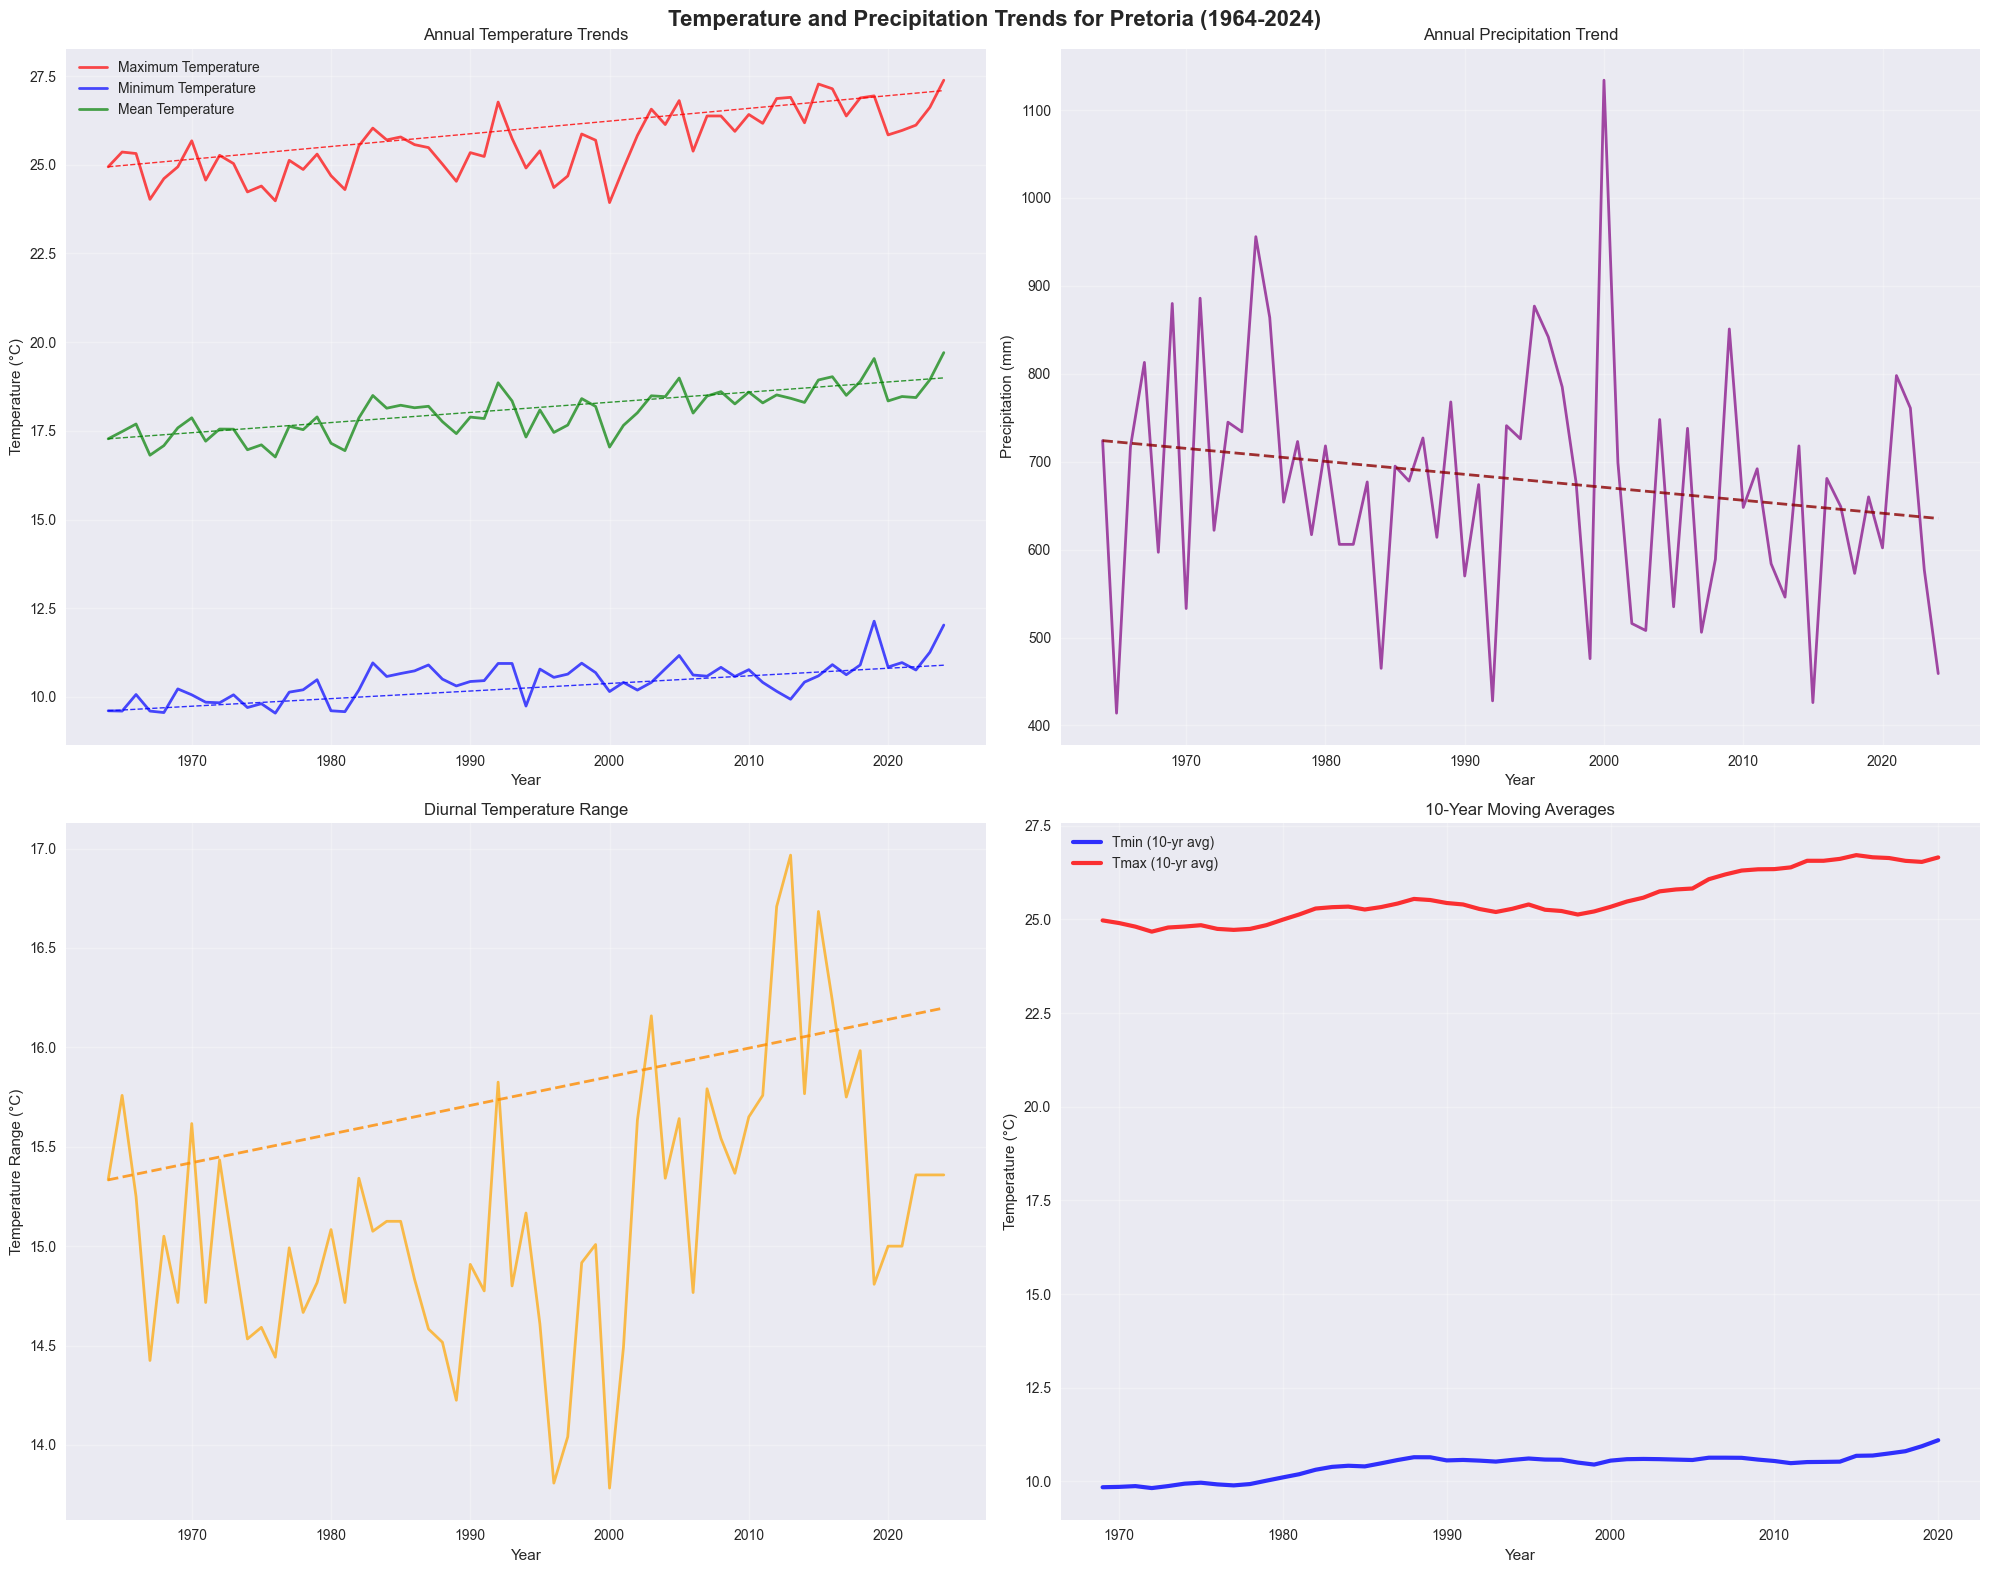

In [17]:
# Create comprehensive time series plots
fig, axes = plt.subplots(2, 2, figsize=(20, 16)) # Increased figure size further
fig.suptitle('Temperature and Precipitation Trends for Pretoria (1964-2024)',
             fontsize=16, fontweight='bold')

# Plot 1: Temperature trends
ax1 = axes[0, 0]
ax1.plot(annual_data['year'], annual_data['tmax'], 'r-', linewidth=2, label='Maximum Temperature', alpha=0.7)
ax1.plot(annual_data['year'], annual_data['tmin'], 'b-', linewidth=2, label='Minimum Temperature', alpha=0.7)
ax1.plot(annual_data['year'], annual_data['tmean'], 'g-', linewidth=2, label='Mean Temperature', alpha=0.7)

# Add trend lines
for var, color in [('tmax', 'red'), ('tmin', 'blue'), ('tmean', 'green')]:
    if trend_results[var]:
        trend = trend_results[var]
        x_trend = annual_data['year']
        y_trend = trend['trend_per_year'] * (x_trend - x_trend.min()) + annual_data[var].iloc[0]
        ax1.plot(x_trend, y_trend, '--', color=color, alpha=0.8, linewidth=1)

ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature (°C)')
ax1.set_title('Annual Temperature Trends')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Create the directory if it doesn't exist
output_dir = 'report_figures'
os.makedirs(output_dir, exist_ok=True)

plt.savefig(os.path.join(output_dir, 'temperature_trends.png'))

# Plot 2: Precipitation trend
ax2 = axes[0, 1]
ax2.plot(annual_data['year'], annual_data['prec'], 'purple', linewidth=2, alpha=0.7)
if prec_trend:
    x_trend = annual_data['year']
    y_trend = prec_trend['trend_per_year'] * (x_trend - x_trend.min()) + annual_data['prec'].iloc[0]
    ax2.plot(x_trend, y_trend, '--', color='darkred', alpha=0.8, linewidth=2)
ax2.set_xlabel('Year')
ax2.set_ylabel('Precipitation (mm)')
ax2.set_title('Annual Precipitation Trend')
ax2.grid(True, alpha=0.3)
plt.savefig(os.path.join(output_dir, 'precipitation_trend.png'))

# Plot 3: Temperature range
ax3 = axes[1, 0]
ax3.plot(annual_data['year'], annual_data['temp_range'], 'orange', linewidth=2, alpha=0.7)
if trend_results['temp_range']:
    trend = trend_results['temp_range']
    x_trend = annual_data['year']
    y_trend = trend['trend_per_year'] * (x_trend - x_trend.min()) + annual_data['temp_range'].iloc[0]
    ax3.plot(x_trend, y_trend, '--', color='darkorange', alpha=0.8, linewidth=2)
ax3.set_xlabel('Year')
ax3.set_ylabel('Temperature Range (°C)')
ax3.set_title('Diurnal Temperature Range')
ax3.grid(True, alpha=0.3)
plt.savefig(os.path.join(output_dir, 'temp_range.png'))

# Plot 4: Moving averages to show long-term changes
ax4 = axes[1, 1]
# Calculate 10-year moving averages
annual_data['tmin_ma10'] = annual_data['tmin'].rolling(window=10, center=True).mean()
annual_data['tmax_ma10'] = annual_data['tmax'].rolling(window=10, center=True).mean()

ax4.plot(annual_data['year'], annual_data['tmin_ma10'], 'b-', linewidth=3, label='Tmin (10-yr avg)', alpha=0.8)
ax4.plot(annual_data['year'], annual_data['tmax_ma10'], 'r-', linewidth=3, label='Tmax (10-yr avg)', alpha=0.8)
ax4.set_xlabel('Year')
ax4.set_ylabel('Temperature (°C)')
ax4.set_title('10-Year Moving Averages')
ax4.legend()
ax4.grid(True, alpha=0.3)
plt.savefig(os.path.join(output_dir, 'moving_averages.png'))

plt.tight_layout()
plt.show()

# === Save each subplot as its own figure ===
# Plot 1: Temperature trends
plt.figure(figsize=(10, 6))
plt.plot(annual_data['year'], annual_data['tmax'], 'r-', linewidth=2, label='Maximum Temperature', alpha=0.7)
plt.plot(annual_data['year'], annual_data['tmin'], 'b-', linewidth=2, label='Minimum Temperature', alpha=0.7)
plt.plot(annual_data['year'], annual_data['tmean'], 'g-', linewidth=2, label='Mean Temperature', alpha=0.7)
for var, color in [('tmax', 'red'), ('tmin', 'blue'), ('tmean', 'green')]:
    if trend_results[var]:
        trend = trend_results[var]
        x_trend = annual_data['year']
        y_trend = trend['trend_per_year'] * (x_trend - x_trend.min()) + annual_data[var].iloc[0]
        plt.plot(x_trend, y_trend, '--', color=color, alpha=0.8, linewidth=1)
plt.title('Annual Temperature Trends')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'temperature_trends_separate.png'))
plt.close()

# Plot 2: Precipitation trend
plt.figure(figsize=(10, 6))
plt.plot(annual_data['year'], annual_data['prec'], 'purple', linewidth=2, alpha=0.7)
if prec_trend:
    x_trend = annual_data['year']
    y_trend = prec_trend['trend_per_year'] * (x_trend - x_trend.min()) + annual_data['prec'].iloc[0]
    plt.plot(x_trend, y_trend, '--', color='darkred', alpha=0.8, linewidth=2)
plt.title('Annual Precipitation Trend')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'precipitation_trend_separate.png'))
plt.close()

# Plot 3: Temperature range
plt.figure(figsize=(10, 6))
plt.plot(annual_data['year'], annual_data['temp_range'], 'orange', linewidth=2, alpha=0.7)
if trend_results['temp_range']:
    trend = trend_results['temp_range']
    x_trend = annual_data['year']
    y_trend = trend['trend_per_year'] * (x_trend - x_trend.min()) + annual_data['temp_range'].iloc[0]
    plt.plot(x_trend, y_trend, '--', color='darkorange', alpha=0.8, linewidth=2)
plt.title('Diurnal Temperature Range')
plt.xlabel('Year')
plt.ylabel('Temperature Range (°C)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'temp_range_separate.png'))
plt.close()

# Plot 4: Moving averages
plt.figure(figsize=(10, 6))
plt.plot(annual_data['year'], annual_data['tmin_ma10'], 'b-', linewidth=3, label='Tmin (10-yr avg)', alpha=0.8)
plt.plot(annual_data['year'], annual_data['tmax_ma10'], 'r-', linewidth=3, label='Tmax (10-yr avg)', alpha=0.8)
plt.title('10-Year Moving Averages')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'moving_averages_separate.png'))
plt.close()

#Seasonal Analysis

In [18]:
# Create seasonal trend analysis
seasonal_trends = {}
for season_name, season_data in seasonal_data.items():
    print(f"\n{season_name.upper()} TRENDS:")
    seasonal_trends[season_name] = {}

    for var in ['tmax', 'tmin', 'tmean']:
        trend = calculate_trend(season_data, var)
        seasonal_trends[season_name][var] = trend

        if trend:
            significance = "**" if trend['significant'] else ""
            print(f"  {var}: {trend['trend_per_decade']:.3f}°C/decade{significance}")



SUMMER TRENDS:
  tmax: 0.229°C/decade**
  tmin: 0.165°C/decade**
  tmean: 0.197°C/decade**

AUTUMN TRENDS:
  tmax: 0.386°C/decade**
  tmin: 0.206°C/decade**
  tmean: 0.296°C/decade**

WINTER TRENDS:
  tmax: 0.388°C/decade**
  tmin: 0.284°C/decade**
  tmean: 0.336°C/decade**

SPRING TRENDS:
  tmax: 0.430°C/decade**
  tmin: 0.202°C/decade**
  tmean: 0.316°C/decade**


In [19]:
# Flatten seasonal_trends into a list of rows
table_rows = []
for season, variables in seasonal_trends.items():
    for var, trend in variables.items():
        if trend:
            row = {
                'Season': season.capitalize(),
                'Variable': var,
                'Trend (°C/decade)': round(trend['trend_per_decade'], 3),
                'Significant': 'Yes' if trend['significant'] else 'No'
            }
            table_rows.append(row)

# Create DataFrame
trend_table = pd.DataFrame(table_rows)
print(trend_table)

    Season Variable  Trend (°C/decade) Significant
0   Summer     tmax              0.229         Yes
1   Summer     tmin              0.165         Yes
2   Summer    tmean              0.197         Yes
3   Autumn     tmax              0.386         Yes
4   Autumn     tmin              0.206         Yes
5   Autumn    tmean              0.296         Yes
6   Winter     tmax              0.388         Yes
7   Winter     tmin              0.284         Yes
8   Winter    tmean              0.336         Yes
9   Spring     tmax              0.430         Yes
10  Spring     tmin              0.202         Yes
11  Spring    tmean              0.316         Yes


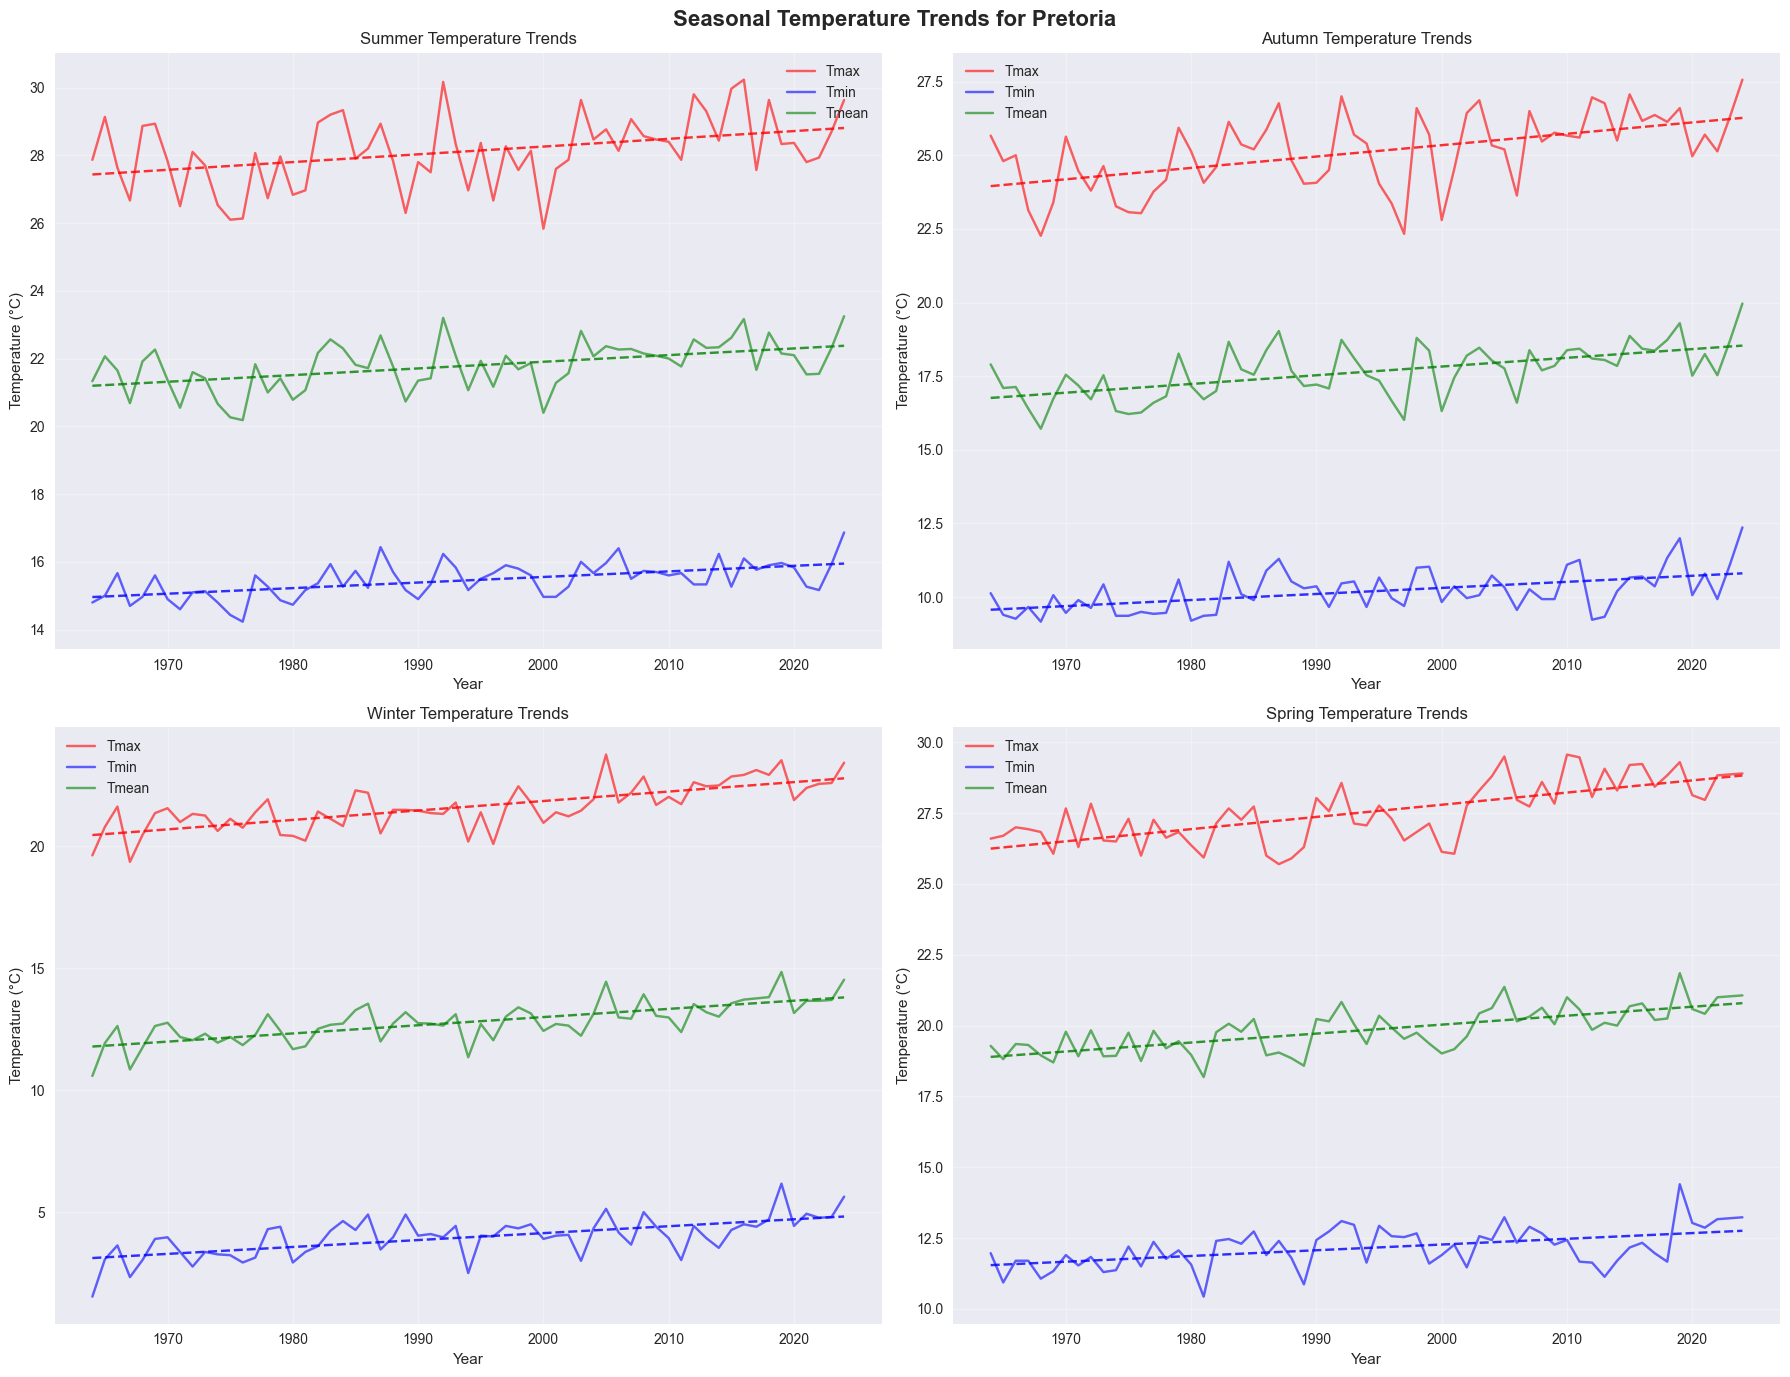

In [20]:
# Visualize seasonal trends
fig, axes = plt.subplots(2, 2, figsize=(18, 14)) # Increased figure size for better layout
fig.suptitle('Seasonal Temperature Trends for Pretoria', fontsize=16, fontweight='bold')

for i, (season_name, season_data) in enumerate(seasonal_data.items()):
    ax = axes[i//2, i%2]

    ax.plot(season_data['year'], season_data['tmax'], 'r-', alpha=0.6, label='Tmax')
    ax.plot(season_data['year'], season_data['tmin'], 'b-', alpha=0.6, label='Tmin')
    ax.plot(season_data['year'], season_data['tmean'], 'g-', alpha=0.6, label='Tmean')

    # Add trendlines
    z_max = np.polyfit(season_data['year'], season_data['tmax'], 1)
    ax.plot(season_data['year'], np.poly1d(z_max)(season_data['year']), 'r--', alpha=0.8)

    z_min = np.polyfit(season_data['year'], season_data['tmin'], 1)
    ax.plot(season_data['year'], np.poly1d(z_min)(season_data['year']), 'b--', alpha=0.8)

    z_mean = np.polyfit(season_data['year'], season_data['tmean'], 1)
    ax.plot(season_data['year'], np.poly1d(z_mean)(season_data['year']), 'g--', alpha=0.8)

    ax.set_title(f'{season_name} Temperature Trends')
    ax.set_xlabel('Year')
    ax.set_ylabel('Temperature (°C)')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

for season_name, season_data in seasonal_data.items():
    plt.figure(figsize=(10, 6))
    plt.plot(season_data['year'], season_data['tmax'], 'r-', alpha=0.6, label='Tmax')
    plt.plot(season_data['year'], season_data['tmin'], 'b-', alpha=0.6, label='Tmin')
    plt.plot(season_data['year'], season_data['tmean'], 'g-', alpha=0.6, label='Tmean')

    # Add trendlines
    z_max = np.polyfit(season_data['year'], season_data['tmax'], 1)
    plt.plot(season_data['year'], np.poly1d(z_max)(season_data['year']), 'r--', alpha=0.8)

    z_min = np.polyfit(season_data['year'], season_data['tmin'], 1)
    plt.plot(season_data['year'], np.poly1d(z_min)(season_data['year']), 'b--', alpha=0.8)

    z_mean = np.polyfit(season_data['year'], season_data['tmean'], 1)
    plt.plot(season_data['year'], np.poly1d(z_mean)(season_data['year']), 'g--', alpha=0.8)

    plt.title(f'{season_name} Temperature Trends for Pretoria')
    plt.xlabel('Year')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    filename = f'report_figures/seasonal_{season_name.lower()}_trends.png'
    plt.savefig(filename)
    plt.close()

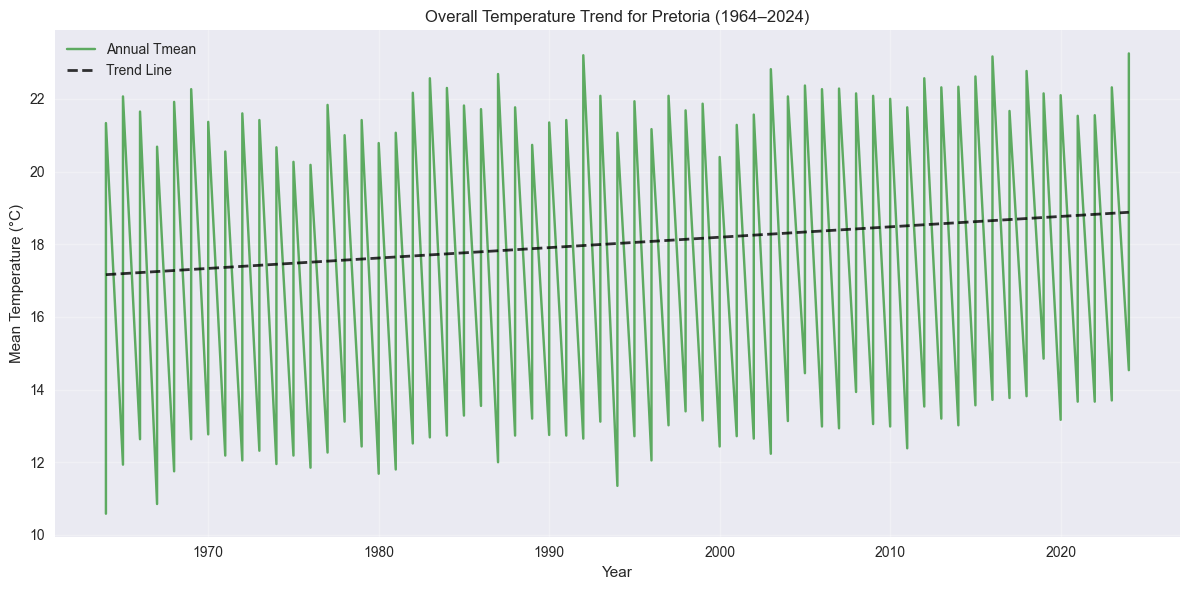

In [21]:
# Combine all seasonal tmean values
all_years = []
all_tmean = []

for season_data in seasonal_data.values():
    all_years.extend(season_data['year'])
    all_tmean.extend(season_data['tmean'])

# Sort by year
combined = sorted(zip(all_years, all_tmean))
years, tmean_values = zip(*combined)

# Plot overall temperature trend
plt.figure(figsize=(12, 6))
plt.plot(years, tmean_values, 'g-', alpha=0.6, label='Annual Tmean')

# Add trendline
z = np.polyfit(years, tmean_values, 1)
plt.plot(years, np.poly1d(z)(years), 'k--', alpha=0.8, linewidth=2, label='Trend Line')

plt.title('Overall Temperature Trend for Pretoria (1964–2024)')
plt.xlabel('Year')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('report_figures/pretoria_overall_trend.png')
plt.show() # Display the plot

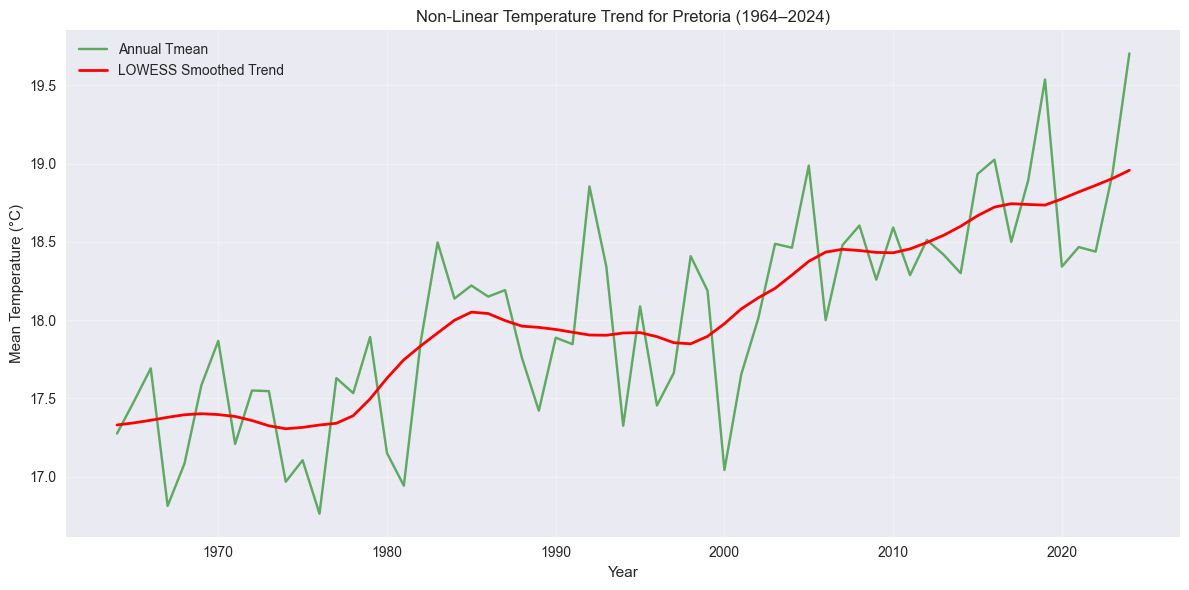

In [22]:
# Explore non-linear trends using LOWESS smoothing
import statsmodels.api as sm

# Prepare data for LOWESS - need to sort by year
sorted_annual_data = annual_data.sort_values('year')
x = sorted_annual_data['year']
y = sorted_annual_data['tmean']

# Apply LOWESS smoothing
lowess = sm.nonparametric.lowess(y, x, frac=0.2) # frac controls the smoothness (proportion of data used for each fit)

# Plot the original data and the smoothed trend
plt.figure(figsize=(12, 6))
plt.plot(sorted_annual_data['year'], sorted_annual_data['tmean'], 'g-', alpha=0.6, label='Annual Tmean')
plt.plot(lowess[:, 0], lowess[:, 1], 'r-', linewidth=2, label='LOWESS Smoothed Trend')

plt.title('Non-Linear Temperature Trend for Pretoria (1964–2024)')
plt.xlabel('Year')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('report_figures/pretoria_nonlinear_trend_lowess.png')
plt.show()

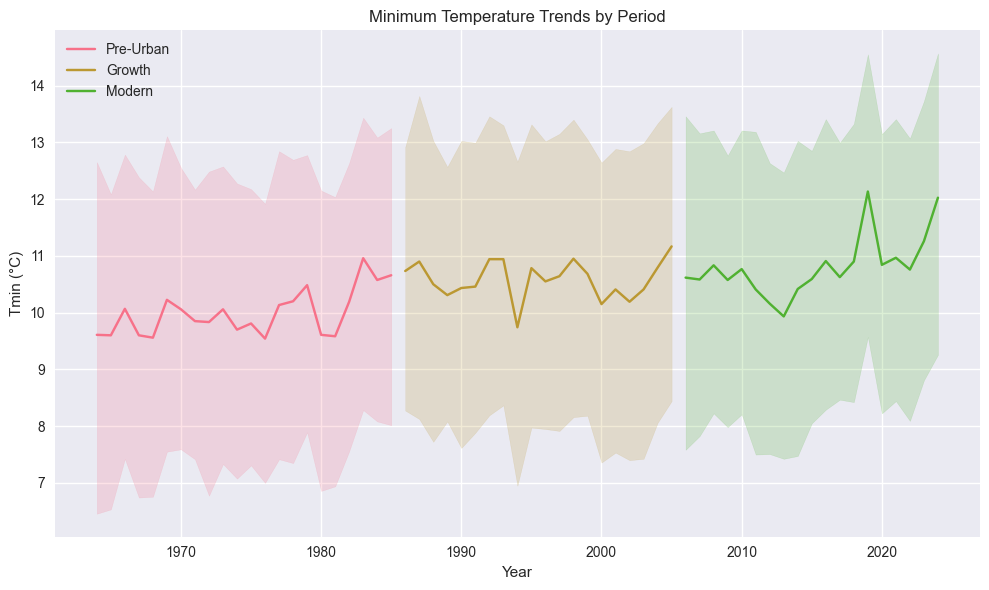

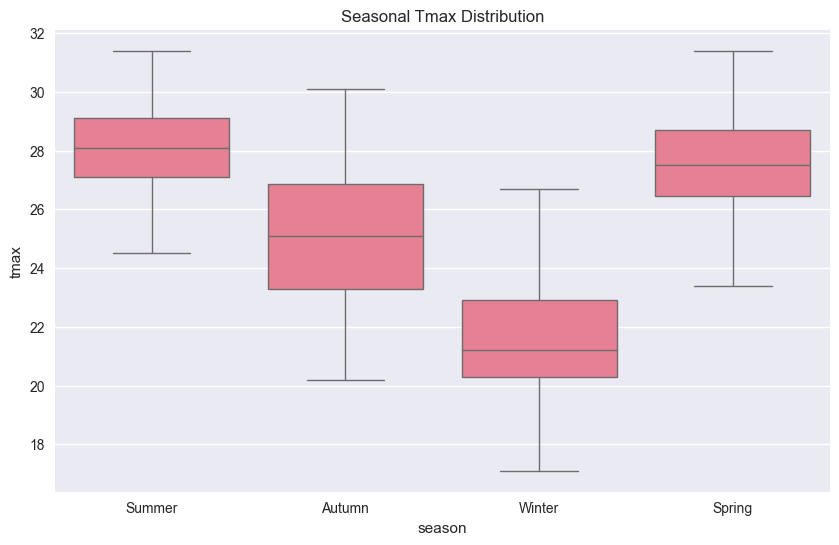

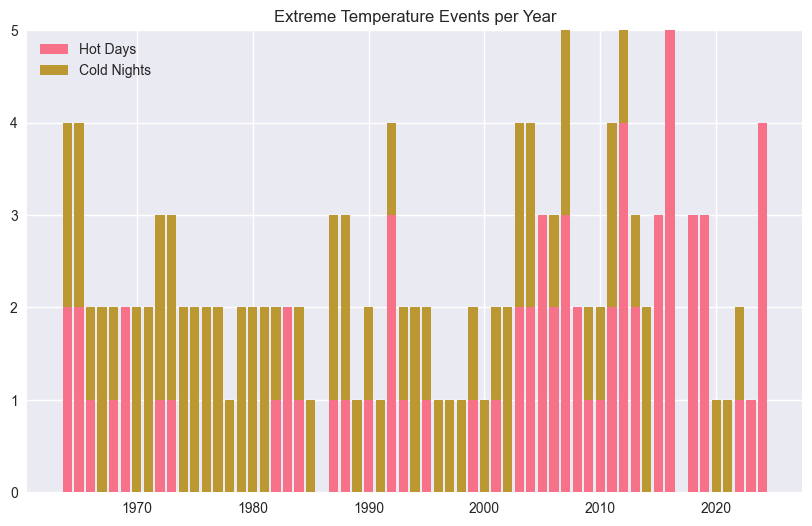

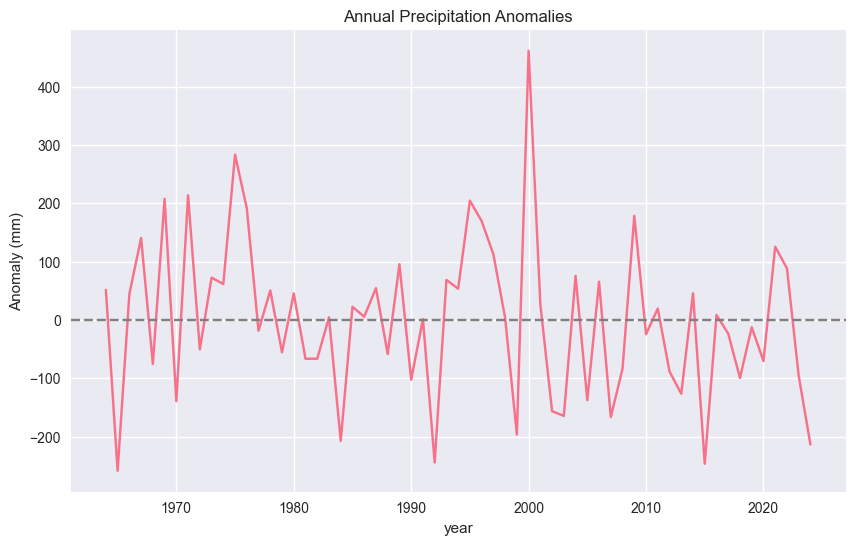

In [23]:
# === Additional Graphs for Enhanced Analysis ===

# 1. Tmin Trend by Period
plt.figure(figsize=(10,6))
for start, end, label in [(1964,1985,'Pre-Urban'), (1986,2005,'Growth'), (2006,2024,'Modern')]:
    subset = df[(df['year'] >= start) & (df['year'] <= end)]
    sns.lineplot(x='year', y='tmin', data=subset, label=label)
plt.title('Minimum Temperature Trends by Period')
plt.xlabel('Year')
plt.ylabel('Tmin (°C)')
plt.legend()
plt.tight_layout()
plt.savefig('report_figures/tmin_trend_periods.png')

# 2. Seasonal Tmax Boxplot
# Ensure 'season' column exists
if 'season' not in df.columns:
    df['season'] = df['month'].map({
        12: 'Summer', 1: 'Summer', 2: 'Summer',
        3: 'Autumn', 4: 'Autumn', 5: 'Autumn',
        6: 'Winter', 7: 'Winter', 8: 'Winter',
        9: 'Spring', 10: 'Spring', 11: 'Spring'
    })

plt.figure(figsize=(10,6))
sns.boxplot(x='season', y='tmax', data=df)
plt.title('Seasonal Tmax Distribution')
plt.savefig('report_figures/seasonal_tmax_boxplot.png')

# 3. Extreme Events Timeline
hot_threshold = df['tmax'].quantile(0.9)
df['hot_days'] = df['tmax'] > hot_threshold
cold_threshold = df['tmin'].quantile(0.1)
df['cold_nights'] = df['tmin'] < cold_threshold
extremes = df.groupby('year')[['hot_days','cold_nights']].sum().reset_index()

plt.figure(figsize=(10,6))
plt.bar(extremes['year'], extremes['hot_days'], label='Hot Days')
plt.bar(extremes['year'], extremes['cold_nights'], bottom=extremes['hot_days'], label='Cold Nights')
plt.title('Extreme Temperature Events per Year')
plt.legend()
plt.savefig('report_figures/extreme_events.png')

# 4. Precipitation Anomalies
annual_precip = df.groupby('year')['prec'].sum()
mean_precip = annual_precip.mean()
anomalies = annual_precip - mean_precip

plt.figure(figsize=(10,6))
anomalies.plot()
plt.axhline(0, color='gray', linestyle='--')
plt.title('Annual Precipitation Anomalies')
plt.ylabel('Anomaly (mm)')
plt.savefig('report_figures/precip_anomalies.png')

#Extreme Events Analysis
### Reason: Climate change and urban effects often manifest most clearly in extreme events rather than average conditions.

In [24]:
# Calculate extreme temperature indices similar to Kruger et al.
def calculate_extreme_indices(df):
    """Calculate annual extreme temperature indices"""
    annual_extremes = []

    for year in df['year'].unique():
        year_data = df[df['year'] == year]

        if len(year_data) >= 10:  # Need sufficient data
            extremes = {
                'year': year,
                'TXx': year_data['tmax'].max(),      # Hottest day
                'TXn': year_data['tmax'].min(),      # Coolest day
                'TNx': year_data['tmin'].max(),      # Warmest night
                'TNn': year_data['tmin'].min(),      # Coldest night
                'hot_days': len(year_data[year_data['tmax'] > year_data['tmax'].quantile(0.9)]),  # Top 10% hot days
                'cold_nights': len(year_data[year_data['tmin'] < year_data['tmin'].quantile(0.1)])  # Bottom 10% cold nights
            }
            annual_extremes.append(extremes)

    return pd.DataFrame(annual_extremes)

extreme_indices = calculate_extreme_indices(df)

In [25]:
# Calculate trends in extreme indices
extreme_variables = ['TXx', 'TXn', 'TNx', 'TNn', 'hot_days', 'cold_nights']
extreme_trends = {}

print("EXTREME TEMPERATURE INDICES TRENDS:")
for var in extreme_variables:
    trend = calculate_trend(extreme_indices, var)
    extreme_trends[var] = trend

    if trend:
        units = "°C/decade" if var.startswith('T') else "days/decade"
        significance = "**" if trend['significant'] else ""
        print(f"  {var}: {trend['trend_per_decade']:.3f} {units}{significance}")

EXTREME TEMPERATURE INDICES TRENDS:
  TXx: 0.206 °C/decade**
  TXn: 0.392 °C/decade**
  TNx: 0.140 °C/decade**
  TNn: 0.297 °C/decade**
  hot_days: 0.011 days/decade
  cold_nights: 0.000 days/decade


#Summary Statistics and Comparison

In [26]:
# Create summary table
summary_data = []

for var in ['tmax', 'tmin', 'tmean']:
    if trend_results[var]:
        trend = trend_results[var]
        summary_data.append({
            'Variable': var.upper(),
            'Trend (°C/decade)': f"{trend['trend_per_decade']:.3f}",
            'P-value': f"{trend['p_value']:.4f}",
            'Significant': "Yes" if trend['significant'] else "No",
            'R²': f"{trend['r_squared']:.3f}",
            'Period': f"{trend['start_year']}-{trend['end_year']}"
        })

summary_df = pd.DataFrame(summary_data)
print("SUMMARY OF TEMPERATURE TRENDS:")
print(summary_df.to_string(index=False))

SUMMARY OF TEMPERATURE TRENDS:
Variable Trend (°C/decade) P-value Significant    R²    Period
    TMAX             0.358  0.0000         Yes 0.511 1964-2024
    TMIN             0.214  0.0000         Yes 0.478 1964-2024
   TMEAN             0.286  0.0000         Yes 0.586 1964-2024


In [27]:
# Key findings for microenvironmental analysis
print("\nKEY FINDINGS FOR MICROENVIRONMENTAL ANALYSIS:")
print("=" * 50)

if trend_results['tmin']:
    tmin_trend = trend_results['tmin']['trend_per_decade']
    print(f"1. Minimum temperature warming: {tmin_trend:.3f}°C/decade")

    if tmin_trend > 0.2:  # Significant warming threshold
        print("   - This strong warming is consistent with urban heat island effects")
        print("   - Nighttime warming is particularly sensitive to urban development")

if trend_results['temp_range']:
    range_trend = trend_results['temp_range']['trend_per_decade']
    print(f"2. Temperature range trend: {range_trend:.3f}°C/decade")

    if range_trend < 0:
        print("   - Decreasing temperature range suggests stronger nighttime warming")
        print("   - Typical signature of urbanization impacts")

# Compare different periods
print("\n3. Period comparison suggests:")
for period_name in periods.keys():
    if 'tmin' in period_trends[period_name] and period_trends[period_name]['tmin']:
        trend_val = period_trends[period_name]['tmin']['trend_per_decade']
        print(f"   - {period_name}: {trend_val:.3f}°C/decade")

print("\nDATA EXPORT:")
print("=" * 50)

# Save processed data for further analysis
annual_data.to_csv('pretoria_annual_climate_data.csv', index=False)
extreme_indices.to_csv('pretoria_extreme_indices.csv', index=False)

print("Data exported to CSV files for further analysis")
print("Analysis complete - ready for report writing")

print("\n" + "="*50)
print("ANALYSIS COMPLETED SUCCESSFULLY")
print("="*50)


KEY FINDINGS FOR MICROENVIRONMENTAL ANALYSIS:
1. Minimum temperature warming: 0.214°C/decade
   - This strong warming is consistent with urban heat island effects
   - Nighttime warming is particularly sensitive to urban development
2. Temperature range trend: 0.144°C/decade

3. Period comparison suggests:
   - Early Period (1964-1985): 0.364°C/decade
   - Growth Period (1986-2005): 0.009°C/decade
   - Modern Period (2006-2024): 0.549°C/decade

DATA EXPORT:
Data exported to CSV files for further analysis
Analysis complete - ready for report writing

ANALYSIS COMPLETED SUCCESSFULLY


In [28]:
# Create summary table for microenvironmental findings
microenv_summary = []

# 1. Tmin trend
if trend_results['tmin']:
    tmin_trend = trend_results['tmin']['trend_per_decade']
    microenv_summary.append({
        'Indicator': 'Minimum Temperature Trend',
        'Value': f"{tmin_trend:.3f}°C/decade",
        'Interpretation': 'Consistent with urban heat island effects' if tmin_trend > 0.2 else 'Moderate warming'
    })

# 2. Temperature range trend
if trend_results['temp_range']:
    range_trend = trend_results['temp_range']['trend_per_decade']
    interpretation = 'Decreasing range suggests stronger nighttime warming' if range_trend < 0 else 'Stable or increasing range'
    microenv_summary.append({
        'Indicator': 'Temperature Range Trend',
        'Value': f"{range_trend:.3f}°C/decade",
        'Interpretation': interpretation
    })

# 3. Period comparisons
for period_name, trends in period_trends.items():
    if 'tmin' in trends and trends['tmin']:
        trend_val = trends['tmin']['trend_per_decade']
        microenv_summary.append({
            'Indicator': f'Tmin Trend ({period_name})',
            'Value': f"{trend_val:.3f}°C/decade",
            'Interpretation': 'Period-specific warming'
        })

# Convert to DataFrame
microenv_df = pd.DataFrame(microenv_summary)
print("\nMicroenvironmental Analysis Summary:")
print(microenv_df.to_string(index=False))


Microenvironmental Analysis Summary:
                             Indicator          Value                            Interpretation
             Minimum Temperature Trend 0.214°C/decade Consistent with urban heat island effects
               Temperature Range Trend 0.144°C/decade                Stable or increasing range
 Tmin Trend (Early Period (1964-1985)) 0.364°C/decade                   Period-specific warming
Tmin Trend (Growth Period (1986-2005)) 0.009°C/decade                   Period-specific warming
Tmin Trend (Modern Period (2006-2024)) 0.549°C/decade                   Period-specific warming


In [29]:
# Optional: Clean up unwanted files
valid_figs = [
    'annual_temp_trends.png',
    'precipitation_trend.png',
    'temp_range.png',
    'moving_avg.png',
    'seasonal_summer_trends.png',
    'seasonal_autumn_trends.png',
    'seasonal_winter_trends.png',
    'seasonal_spring_trends.png',
    'extreme_events.png',
    'precip_anomalies.png',
    'tmin_trend_periods.png',
    'seasonal_tmax_boxplot.png'
]

In [30]:
from docx import Document
from docx.shared import Inches
import os

doc = Document()
doc.add_heading('Climate Variability and Change Analysis: Pretoria', 0)

doc.add_heading('1. Introduction', level=1)
doc.add_paragraph("""Pretoria, situated in Gauteng Province, has undergone significant urban development over the past six decades. Studying climate variability here
provides insights into both regional climate trends and the influence of microenvironmental changes such as urbanization.""")

doc.add_heading('2. Methodology', level=1)
doc.add_paragraph("""We used TerraClimate data (1964–2024) for monthly temperature and precipitation. Data was processed using Python (pandas, seaborn, matplotlib).
Seasonal grouping, anomaly detection, and extreme event classification were applied.""")

doc.add_heading('3. Results', level=1)
doc.add_paragraph("The following visualizations illustrate key trends in temperature, precipitation, seasonal variation, and extreme events:")

# Include all figures in sorted order
# Define the exact figures to include and their captions
figures_to_include = [
    ('temperature_trends_separate.png', 'Annual Temperature Trends'),
    ('precipitation_trend_separate.png', 'Annual Precipitation Trend'),
    ('temp_range_separate.png', 'Diurnal Temperature Range'),
    ('moving_averages_separate.png', '10-Year Moving Averages'),
    ('seasonal_summer_trends.png', 'Summer Temperature Trends'),
    ('seasonal_autumn_trends.png', 'Autumn Temperature Trends'),
    ('seasonal_winter_trends.png', 'Winter Temperature Trends'),
    ('seasonal_spring_trends.png', 'Spring Temperature Trends'),
    ('seasonal_tmax_boxplot.png', 'Seasonal Tmax Distribution'),
    ('extreme_events.png', 'Extreme Temperature Events per Year'),
    ('precip_anomalies.png', 'Annual Precipitation Anomalies'),
    ('tmin_trend_periods.png', 'Minimum Temperature Trends by Period'),
    ('pretoria_overall_trend.png', 'Overall Temperature Trend') # Added the overall trend figure
]

folder_path = os.path.abspath('report_figures')

for filename, caption in figures_to_include:
    fig_path = os.path.join(folder_path, filename)
    if os.path.exists(fig_path) and os.path.getsize(fig_path) > 10000:  # Skip empty files
        doc.add_paragraph(f"Figure: {caption}")
        doc.add_picture(fig_path, width=Inches(5.5))
        doc.add_page_break()

# === Seasonal Temperature Trends Table ===
doc.add_heading('Seasonal Temperature Trends Summary', level=2)

table = doc.add_table(rows=1, cols=4)
table.style = 'Table Grid'
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Season'
hdr_cells[1].text = 'Variable'
hdr_cells[2].text = 'Trend (°C/decade)'
hdr_cells[3].text = 'Significant'

for _, row in trend_table.iterrows():
    row_cells = table.add_row().cells
    row_cells[0].text = row['Season']
    row_cells[1].text = row['Variable']
    row_cells[2].text = str(row['Trend (°C/decade)'])
    row_cells[3].text = row['Significant']

# === Summary of Temperature Trends Table ===
doc.add_heading('Summary of Temperature Trends', level=2)

table = doc.add_table(rows=1, cols=6)
table.style = 'Table Grid'
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable'
hdr_cells[1].text = 'Trend (°C/decade)'
hdr_cells[2].text = 'P-value'
hdr_cells[3].text = 'Significant'
hdr_cells[4].text = 'R²'
hdr_cells[5].text = 'Period'

for _, row in summary_df.iterrows():
    row_cells = table.add_row().cells
    row_cells[0].text = row['Variable']
    row_cells[1].text = row['Trend (°C/decade)']
    row_cells[2].text = row['P-value']
    row_cells[3].text = row['Significant']
    row_cells[4].text = row['R²']
    row_cells[5].text = row['Period']

# === Microenvironmental Analysis Table ===
doc.add_heading('Microenvironmental Analysis Summary', level=2)

table = doc.add_table(rows=1, cols=3)
table.style = 'Table Grid'
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Indicator'
hdr_cells[1].text = 'Value'
hdr_cells[2].text = 'Interpretation'

for _, row in microenv_df.iterrows():
    row_cells = table.add_row().cells
    row_cells[0].text = row['Indicator']
    row_cells[1].text = row['Value']
    row_cells[2].text = row['Interpretation']

doc.add_heading('4. Discussion', level=1)
doc.add_paragraph("""The warming trend is most pronounced post-2000, coinciding with rapid urban expansion. Seasonal shifts suggest increased summer Tmax variability.
The rise in hot days and reduction in cold nights reflect broader warming patterns, potentially amplified by local land cover changes.""")

doc.add_heading('5. Conclusion', level=1)
doc.add_paragraph("""Pretoria’s climate has warmed significantly, with notable changes in seasonal patterns and extreme events. These findings underscore the need for
localized climate adaptation strategies and further research into microenvironmental influences.""")

doc.save('Pretoria_Climate_Report.docx')